In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
songs = pd.read_csv('../input/spotify-million-song-dataset/spotify_millsongdata.csv')

In [3]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
songs = songs.sample(n=20000).drop('link', axis=1).reset_index(drop=True)
songs['text'] = songs['text'].str.replace(r'\n', '', regex=True)

In [5]:
songs.head()

,artist,song,text
0,Peter Gabriel,Indigo,It's too late \rThis model's out of date \rG...
1,Old 97's,No Mother,In the valley of the shadows I'm waiting \rFo...
2,Flo-Rida,All My Life,"[Chorus: x2] \rAll my life, had to hustle jus..."
3,Otis Redding,Shake,Shake! (Everybody say it!) \rShake! (Early in...
4,Rihanna,Now I Know,"Took a chance, rolled the dice on me and you ..."


In [6]:
text_input = """Wise men say
Only fools rush in
But I can't help falling in love with you
Shall I stay?
Would it be a sin
If I can't help falling in love with you?
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
Like a river flows
Surely to the sea
Darling, so it goes
Some things are meant to be
Take my hand
Take my whole life, too
For I can't help falling in love with you
For I can't help falling in love with you"""

In [7]:
songs2: pd.DataFrame = songs.append(songs.iloc[0])
songs2.loc[songs2.index[-1], 'text'] = text_input
songs2.loc[songs2.index[-1], 'song'] = "Input_Song"
songs2

,artist,song,text
0,Peter Gabriel,Input_Song,Wise men say\nOnly fools rush in\nBut I can't ...
1,Old 97's,No Mother,In the valley of the shadows I'm waiting \rFo...
2,Flo-Rida,All My Life,"[Chorus: x2] \rAll my life, had to hustle jus..."
3,Otis Redding,Shake,Shake! (Everybody say it!) \rShake! (Early in...
4,Rihanna,Now I Know,"Took a chance, rolled the dice on me and you ..."
...,...,...,...
19996,Lionel Richie,Can't Slow Down,I know what's on your mind. \rYou feel you're...
19997,Procol Harum,Wizard Man,Wizard man's got a magic tooth \rCarry it low...
19998,Crowded House,Now We're Getting Somewhere,It never used to be that bad \rBut neither wa...
19999,Alphaville,Wake Up!,"I saw you smile, i saw you true, i saw you thr..."


In [8]:
documents = [f for f in songs['text']]
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')
lyrics_matrix = tfidf.fit_transform(documents)
print(lyrics_matrix, lyrics_matrix.shape)

  (0, 39459)	0.08091985225206588
  (0, 2814)	0.249151028468534
  (0, 40717)	0.08359124472217677
  (0, 14509)	0.0721909469888967
  (0, 46345)	0.07521050703109583
  (0, 14971)	0.08557735374221835
  (0, 18594)	0.05550669816435668
  (0, 19707)	0.052893266619991434
  (0, 22523)	0.029167389950470884
  (0, 10388)	0.15833372558930225
  (0, 44742)	0.0642727778092295
  (0, 28942)	0.07676398156263678
  (0, 24771)	0.04783390159115154
  (0, 18876)	0.07173739361155201
  (0, 29635)	0.036922552825100874
  (0, 10476)	0.061867343740125806
  (0, 23709)	0.0712959876034754
  (0, 40773)	0.08818846425186372
  (0, 23237)	0.02911055525787678
  (0, 11425)	0.062366439795581693
  (0, 15194)	0.06842137039709412
  (0, 17323)	0.08142061110803815
  (0, 1486)	0.07086609522316503
  (0, 24593)	0.13118221700848262
  (0, 47861)	0.09393992144968892
  :	:
  (19999, 36689)	0.3909595892100629
  (19999, 41284)	0.28614710052381903
  (19999, 7231)	0.16605728937346056
  (19999, 5916)	0.13056557564619548
  (19999, 4087)	0.05330670

In [9]:
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = songs[0:10]['song']
  df.index = songs[0:10]['song']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

In [10]:
cosine_similarities = cosine_similarity(lyrics_matrix)

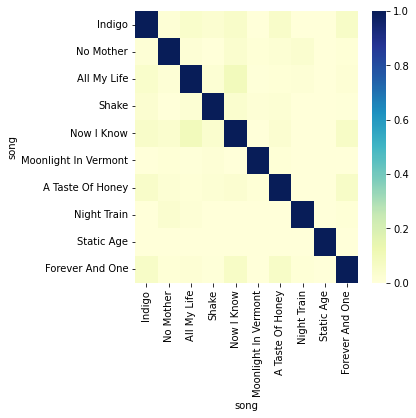

In [11]:
create_heatmap(similarity= cosine_similarities[0:10, 0:10])

In [12]:
similarities = {}

for i in range(len(cosine_similarities)):
    similar_indices = cosine_similarities[i].argsort()[:-50:-1]
    similarities[songs2['song'].iloc[i]] = [(cosine_similarities[i][x], songs2['song'][x], songs2['artist'][x]) for x in similar_indices][1:]

In [13]:
class Recommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]}")
            print("--------------------")
        
    def recommend(self, recommendation):
        song = recommendation['song']
        number_songs = recommendation['number_songs']
        recom_song = self.matrix_similar[song][:number_songs]
        self._print_message(song=song, recom_song=recom_song)

In [14]:
recommedations = Recommender(similarities)

In [15]:
recommendation2 = {
    "song": songs['song'].iloc[-1],
    "number_songs": 5
}
recommedations.recommend(recommendation2)

The 5 recommended songs are:
Number 1:
I Saw It Again by Phish
--------------------
Number 2:
Despair by Yeah Yeah Yeahs
--------------------
Number 3:
Open Your Eyes by Doobie Brothers
--------------------
Number 4:
Needles And Pins by Ramones
--------------------
Number 5:
The Sign by Ace Of Base
--------------------
